In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
# read data
df = pd.read_csv('../Input_data/' + 'single_type_chart' + '.csv', index_col=0)
ntypes = df.shape[0]
df.head()

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
defense\attack,,,,,,,,,,,,,,,,,,
Normal,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
Fire,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
Water,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Electric,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Grass,1.0,2.0,0.5,0.5,0.5,2.0,1.0,2.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
type_colors = {
    'Normal':   '#A8A77A',
    'Fire':     '#EE8130',
    'Water':    '#6390F0',
    'Electric': '#F7D02C',
    'Grass':    '#7AC74C',
    'Ice':      '#96D9D6',
    'Fighting': '#C22E28',
    'Poison':   '#A33EA1',
    'Ground':   '#E2BF65',
    'Flying':   '#A98FF3',
    'Psychic':  '#F95587',
    'Bug':      '#A6B91A',
    'Rock':     '#B6A136',
    'Ghost':    '#735797',
    'Dragon':   '#6F35FC',
    'Dark':     '#705746',
    'Steel':    '#B7B7CE',
    'Fairy':    '#D685AD',
}

colors_key = list(type_colors.keys())
colors_hex = list(type_colors.values())
num_colors = len(colors_key)

# Statistics along rows and columns

In [4]:
# calculations for each row: total damage taken in
damage_in_avg = df.mean(axis=1)
damage_in_var = df.var(axis=1)

# calculations for each column: total damage given out
damage_out_avg = df.mean(axis=0)
damage_out_var = df.var(axis=0)

ptypes = df.index
ptypes.name = 'damage'
# print(ptypes)
df2 = pd.DataFrame(index=ptypes)

# after doing row and column sums we can add them to the dataframe
df2['in_avg'] = -damage_in_avg
df2['out_avg'] = damage_out_avg
df2['in_var'] = damage_in_var
df2['out_var'] = damage_out_var

# --- Compute damage given - taken
df2['net_avg'] = df2['out_avg'] + df2['in_avg']
df2['net_var'] = df2['out_var'] + df2['in_var']
df2['out_std'] = np.sqrt(df2['out_var'])
df2['in_std'] = np.sqrt(df2['in_var'])
df2['net_std'] = np.sqrt(df2['net_var'])

df2.to_csv('../Output_data/single_attacker_vs_single_defender_mean_stdev.csv')
df2

,in_avg,out_avg,in_var,out_var,net_avg,net_var,out_std,in_std,net_std
damage,,,,,,,,,
Normal,-1.000000,0.888889,0.117647,0.075163,-0.111111,0.192810,0.274159,0.342997,0.439102
Fire,-1.000000,1.111111,0.264706,0.281046,0.111111,0.545752,0.530137,0.514496,0.738750
Water,-1.000000,1.083333,0.176471,0.213235,0.083333,0.389706,0.461774,0.420084,0.624264
Electric,-0.972222,0.972222,0.102124,0.219771,0.000000,0.321895,0.468798,0.319569,0.567358
Grass,-1.166667,0.972222,0.323529,0.278595,-0.194444,0.602124,0.527821,0.568796,0.775967
Ice,-1.194444,1.111111,0.209967,0.281046,-0.083333,0.491013,0.530137,0.458222,0.700723
Fighting,-1.083333,1.083333,0.213235,0.419118,0.000000,0.632353,0.647393,0.461774,0.795206
Poison,-0.972222,0.944444,0.190359,0.232026,-0.027778,0.422386,0.481691,0.436302,0.649912
Ground,-1.055556,1.166667,0.261438,0.352941,0.111111,0.614379,0.594089,0.511310,0.783823


# Visualize bar charts

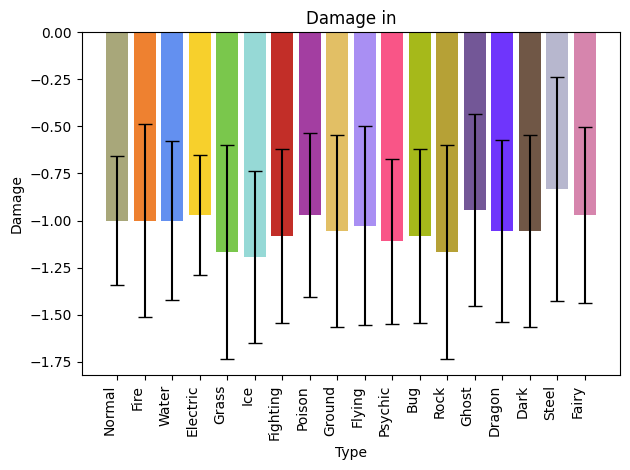

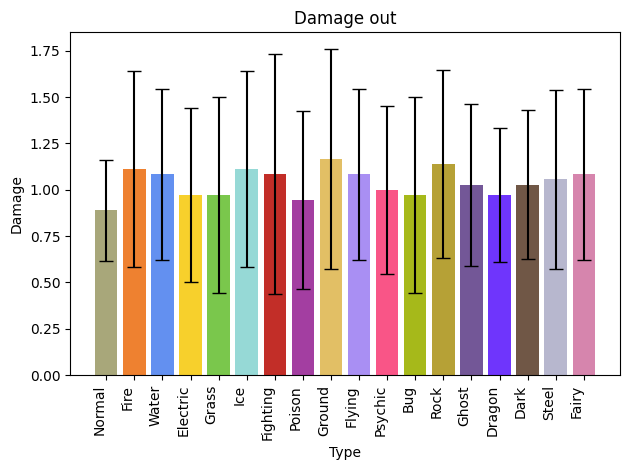

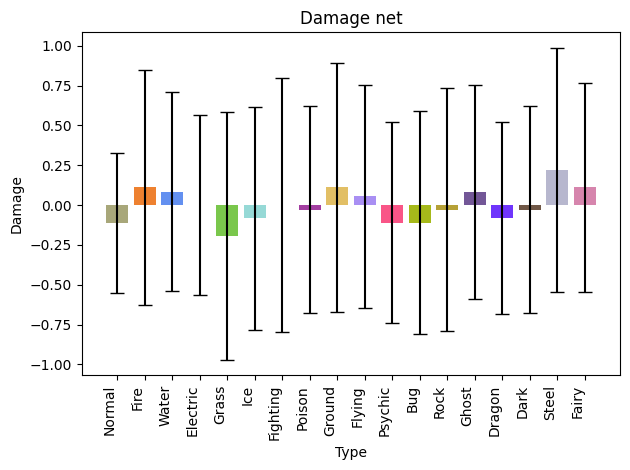

In [5]:
labels = ['in', 'out', 'net']
for i,l in enumerate(labels):
    means = df2[ l + '_avg' ]
    stds = df2[ l + '_std' ]

    # Assign colors based on type
    colors = [type_colors.get(t, '#777777') for t in df2.index]  # default gray if missing
    # Assign color based on sign
    # colors = ['lightskyblue' if val >= 0 else 'salmon' for val in means]
    plt.bar(df2.index, means, yerr=stds, capsize=5, color=colors)
    plt.xlabel('Type')
    plt.ylabel('Damage')
    plt.title('Damage ' + l )
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()


We can see steel has deals the most net damage and grass is the worst overall

# Visualize Damage Received Scatter

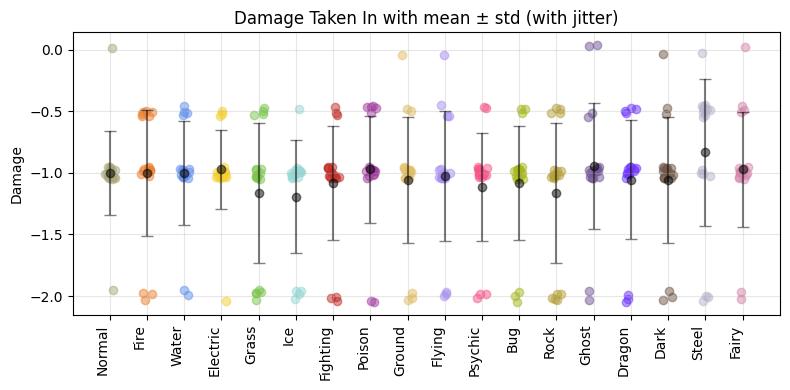

In [6]:
x_positions = np.arange(len(df))

fig, ax = plt.subplots(figsize=(8, 4))
for i, (idx, row) in enumerate(df.iterrows()):
    mean = -row.mean()
    std = row.std()
    ax.errorbar(i, mean, yerr=std, fmt='o', color='black', capsize=4, lw=1.5, alpha=0.5)
    
    # Add small jitter in both x and y directions
    x = np.full(len(row), i) + np.random.uniform(-0.15, 0.15, size=len(row))
    y = -row.values + np.random.uniform(-0.05, 0.05, size=len(row))  # vertical jitter
    # Assign colors based on type
    # print(row.name)
    color = type_colors.get(row.name, '#777777')
    ax.scatter(x, y, alpha=0.5, color=color)
    
# Formatting
ax.set_xticks(x_positions)
ax.set_xticklabels(df.index)
ax.set_xticklabels(df.index, rotation=90, ha='right')  # rotate labels here
ax.set_title("Damage Taken In with mean ± std (with jitter)")
ax.set_ylabel("Damage")
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

We can see steel has the least damage taken, followed by ghost no surprise given double 0 damage instances

# Visualize Damage Given Scatter

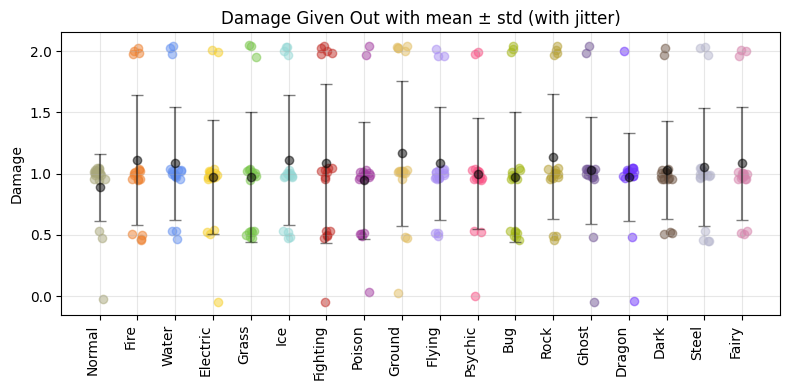

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
x_positions = np.arange(len(df.columns))

for i, (col, values) in enumerate(df.items()):

    # Mean and std for this column
    mean = values.mean()
    std = values.std()
    ax.errorbar(i, mean, yerr=std, fmt='o', color='black', capsize=4, lw=1.5, alpha=0.5)
    
    # Add jitter in both directions
    x = np.full(len(values), i) + np.random.uniform(-0.15, 0.15, size=len(values))
    y = values + np.random.uniform(-0.05, 0.05, size=len(values))  
    color = type_colors.get(col, '#777777')
    ax.scatter(x, y, alpha=0.5, color=color)

ax.set_xticks(x_positions)
ax.set_xticklabels(df.index, rotation=90, ha='right')  # rotate labels here
ax.set_title("Damage Given Out with mean ± std (with jitter)")
ax.set_ylabel("Damage")
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

We can see ground and rock are the best damage dealers

# Combine both scatter and bar charts

In [8]:
def plot_scatter_and_means(df, jitter_x=0.15, jitter_y=0.05, figsize=(12, 8)):
    
    alpha = 0.5
    """
    Creates a 2x2 figure:
      col 0: column-scatter (top), column means ± std barchart (bottom)
      col 1: row-scatter    (top), row    means ± std barchart (bottom)
    """
    n_cols = len(df.columns)
    n_rows = len(df.index)

    fig, axes = plt.subplots(2, 2, figsize=figsize, sharey=False)
    ax_col_scatter, ax_col_bar = axes[0, 0], axes[1, 0]
    ax_row_scatter, ax_row_bar = axes[0, 1], axes[1, 1]

    # -------------------
    # Column scatter (top-left)
    # -------------------
    x_positions = np.arange(n_cols)
    for i, (col, series) in enumerate(df.items()):
        vals = series.values
        # jitter
        x = np.full(len(vals), i) + np.random.uniform(-jitter_x, jitter_x, size=len(vals))
        y = vals + np.random.uniform(-jitter_y, jitter_y, size=len(vals))
        color = type_colors.get(col, '#777777')
        ax_col_scatter.scatter(x, y, alpha=alpha,color=color)
        # mean + std marker
        mean = vals.mean()
        std = vals.std(ddof=1)  # sample std by default; use ddof=0 if you prefer population
        ax_col_scatter.errorbar(i, mean, yerr=std, fmt='o', color='black', capsize=4, lw=1.5, alpha=alpha)

    ax_col_scatter.set_xticks(x_positions)
    ax_col_scatter.set_xticklabels(df.columns, rotation=90, ha='right')
    ax_col_scatter.set_title('Scatter Damage Out (with mean ± std)')
    ax_col_scatter.set_ylabel('Damage')
    ax_col_scatter.grid(alpha=alpha)

    # -------------------
    # Column bar (bottom-left)
    # -------------------
    col_means = df.mean(axis=0)
    col_stds  = df.std(axis=0, ddof=1)
    colors = [type_colors.get(t, '#777777') for t in df2.index]  
    ax_col_bar.bar(x_positions, col_means, yerr=col_stds, capsize=6, color=colors)
    ax_col_bar.set_xticks(x_positions)
    ax_col_bar.set_xticklabels(df.columns, rotation=90, ha='right')
    ax_col_bar.set_title('Damage Out means ± std')
    ax_col_bar.set_ylabel('Mean Damage')
    ax_col_bar.grid(alpha=alpha)

    # -------------------
    # Row scatter (top-right)
    # -------------------
    x_positions_rows = np.arange(n_rows)
    for i, (idx, row) in enumerate(df.iterrows()):
        vals = row.values
        x = np.full(len(vals), i) + np.random.uniform(-jitter_x, jitter_x, size=len(vals))
        y = vals + np.random.uniform(-jitter_y, jitter_y, size=len(vals))
        color = type_colors.get(row.name, '#777777')
        ax_row_scatter.scatter(x, y, alpha=alpha, color=color)
        mean = vals.mean()
        std = vals.std(ddof=1)
        ax_row_scatter.errorbar(i, mean, yerr=std, fmt='o', color='black', capsize=4, lw=1.5, alpha=alpha)

    ax_row_scatter.set_xticks(x_positions_rows)
    ax_row_scatter.set_xticklabels(df.index, rotation=90, ha='right')
    ax_row_scatter.set_title('Scatter Damage In (with mean ± std)')
    ax_row_scatter.grid(alpha=alpha)

    # -------------------
    # Row bar (bottom-right)
    # -------------------
    row_means = df.mean(axis=1)
    row_stds  = df.std(axis=1, ddof=1)
    colors = [type_colors.get(t, '#777777') for t in df2.index]  
    ax_row_bar.bar(x_positions_rows, row_means, yerr=row_stds, capsize=6, color=colors)
    ax_row_bar.set_xticks(x_positions_rows)
    ax_row_bar.set_xticklabels(df.index, rotation=90, ha='right')
    ax_row_bar.set_title('Damage In means ± std')
    ax_row_bar.set_ylabel('Mean Damage')
    ax_row_bar.grid(alpha=alpha)

    plt.tight_layout()
    plt.show()


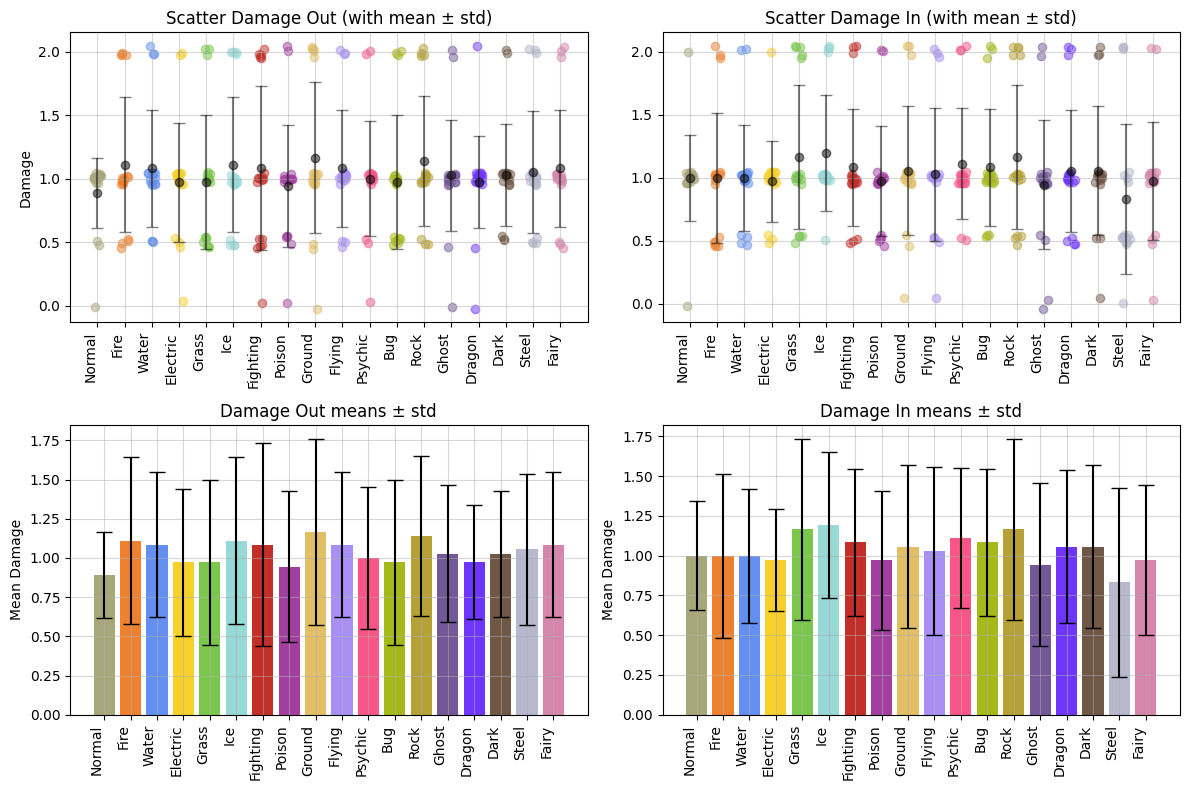

In [9]:
plot_scatter_and_means(df)

# look at the matrix minus transpose

In [10]:
# by doing this we are comparing how much does A damage B vs B damage A. only relative damage
df3 = df - df.T
df3.index.name = 'defense\\attack'
df3

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
defense\attack,,,,,,,,,,,,,,,,,,
Normal,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0
Fire,0.0,0.0,1.5,0.0,-1.5,-1.5,0.0,0.0,1.0,0.0,0.0,-1.5,1.5,0.0,0.5,0.0,-1.5,-0.5
Water,0.0,-1.5,0.0,1.0,1.5,-0.5,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.5,0.0,-0.5,0.0
Electric,0.0,0.0,-1.0,0.0,0.5,0.0,0.0,0.0,2.0,-1.5,0.0,0.0,0.0,0.0,0.5,0.0,-0.5,0.0
Grass,0.0,1.5,-1.5,-0.5,0.0,1.0,0.0,1.5,-1.5,1.5,0.0,1.5,-1.0,0.0,0.5,0.0,0.5,0.0
Ice,0.0,1.5,0.5,0.0,-1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0,-1.0,0.0,1.5,0.0
Fighting,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.5,0.0,1.5,1.5,0.0,-1.5,1.0,0.0,-1.5,-1.0,1.5
Poison,0.0,0.0,0.0,0.0,-1.5,0.0,-0.5,0.0,1.5,0.0,1.0,-0.5,0.5,0.5,0.0,0.0,1.0,-1.5
Ground,0.0,-1.0,1.0,-2.0,1.5,1.0,0.0,-1.5,0.0,1.0,0.0,0.5,-1.5,0.0,0.0,0.0,-1.0,0.0


# sort the data by relative damage totals

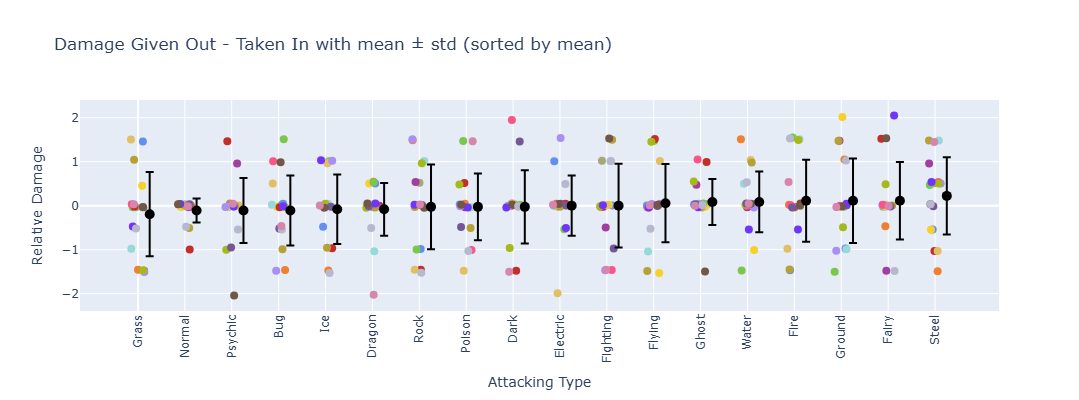

In [13]:
# Compute column means and get the sorted order
col_means = df3.mean(axis=0)
sorted_cols = col_means.sort_values().index  # ascending order

fig = go.Figure()
offset = 0.25  # shift centroids

for i, col in enumerate(sorted_cols):
    values = df3[col]
    
    # Jittered scatter positions
    x = np.full(len(values), i) + np.random.uniform(-0.15, 0.15, size=len(values))
    y = values + np.random.uniform(-0.05, 0.05, size=len(values))

    colors = [type_colors.get(t, '#777777') for t in df2.index]  
    
    """
    # Color points by sign with transparency
    colors = [
    'rgba(255,128,114,0.5)' if val < 0 else
    'rgba(128,0,128,0.5)' if val == 0 else
    'rgba(135,206,235,0.5)' 
    for val in values
]
    """
    
    # Scatter points (hover shows only row label)
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers',
        marker=dict(color=colors, size=8),
        text=df3.index,
        hovertemplate='%{text}<extra></extra>',
        showlegend=False
    ))
    
    # Mean ± std markers (shifted)
    mean = values.mean()
    std = values.std()
    fig.add_trace(go.Scatter(
        x=[i + offset],
        y=[mean],
        mode='markers',
        marker=dict(color='black', size=10),
        error_y=dict(type='data', array=[std], visible=True),
        hoverinfo='skip',
        showlegend=False
    ))

# Ensure x-axis, ticks, and labels all match the sorted order
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=np.arange(len(sorted_cols)),
        ticktext=sorted_cols,
        tickangle=-90
    ),
    yaxis_title="Relative Damage",
    xaxis_title='Attacking Type',
    title="Damage Given Out - Taken In with mean ± std (sorted by mean)",
    width=900,
    height=400,
    showlegend=False
)

fig.show()
# print(len(fig.data)) 

We see the ranked results has steel be the most consistent, despite not having the strongest relative damages. Grass is the worst, despite normal being a worst or equal matchup against most things